# Исследовательский проект
## Халуева Виктория МЧР201
Predict who will move to a new job

Датасет: 
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

Порядок повествования: 
* Постановка проблемы
* Импорт данных, разведочный анализ данных
* Предварительная оценка возможных фич
* Подготовка пайплайна данных, инжиниринг фич
* Подготовка и обучение модели, сравнение разных реализаций
* Выводы

# Прогнозирование смены места работы кандидата после прохождения курсов компании

**План**

1. Постановка проблемы
<br>1.1 Обзор проблемы<br>
1.2 Постановка задачи<br>

2. Анализ данных
<br>2.1 Импорт данных<br>
2.2 Разведочный анализ данных<br>
2.3 Предварительная оценка возможных фич<br>

3. Подготовка пайплайна данных, инжиниринг фич
<br>3.1 Label Encoding<br>
3.2 Корреляция<br>
3.3 Скалирование<br>

4. Подготовка и обучение модели, сравнение разных реализаций
<br>4.1 Сравнение моделей<br>
4.2 Логистическая регрессия<br>

Выводы

## 1. Постановка проблемы

### Обзор проблемы

Компания, активно работающая в области больших данных и науки о данных, хочет нанять специалистов по обработке данных из числа людей, успешно прошедших некоторые курсы, проводимые компанией. Многие люди записываются на их обучение. Компания хочет знать, кто из этих кандидатов действительно хочет работать в компании после обучения или ищет новую работу.

Цель любой компании - повышение прибыли. На повышение прибыли влиет множество факторов, в том числе и производительность и компетентность персонала компании. Таким образом одна из задач компании - получить как можно больше успешных кандидатов. Однако встаёт вопрос как сделать это эффективно? Какие факторы влияют на то, что кандидат у нас останется? Чем быстрее закрыта вакансия, тем меньше потрачено ресурсов компании: денежных и временых. Кандидат проходит собеседование, тесты, его готовы принять. Но при этом это не значит, что сам кандидат готов принять предложение компании.

В данном исследовании мы разберём проблему смены места работы кандидата после прохождения курсов компании.

### Постановка задачи

В данном исследовании мы будем решать следующие задачи: <br>
> ** Определить ключевые показатели смены места работы кандидата после прохождения курсов компании. <br>
Разработать предсказывающую модель смены места работы кандидата после прохождения курсов компании. ** <br>

![title](https://peopleforce.io/wp-content/uploads/2020/09/9-voprosov-kandidatu-_-PeopleForce.png)

## 2. Анализ данных

В этом тематическом исследовании набор данных был получен из [HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists), который содержит данные о 19158 кандидатах с различной информацией. Я буду использовать этот набор данных, чтобы предсказать, сменят ли кандидаты работу, понимая основные факторы оттока.

**Target: **0 – Not looking for job change, 1 – Looking for a job change

### Импорт данных

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

In [2]:
df_hr = pd.read_csv('aug_train.csv')

In [3]:
df_hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Разведочный анализ данных

In [4]:
# Посмотрим сколько у нас уникальный кандидатов
df_hr['enrollee_id'].nunique()

19158

In [5]:
df_hr.shape

(19158, 14)

In [6]:
# Посмотрим на пустые строки
df_hr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
df_hr.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [8]:
# Заполним пропуски с помощью моды
for col in df_hr.columns:
    df_hr[col].fillna(df_hr[col].mode()[0], inplace=True)

In [9]:
# Проверим, точно ли всё заполнилось
df_hr.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [10]:
# Рассмотрим наши столбцы
df_hr.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

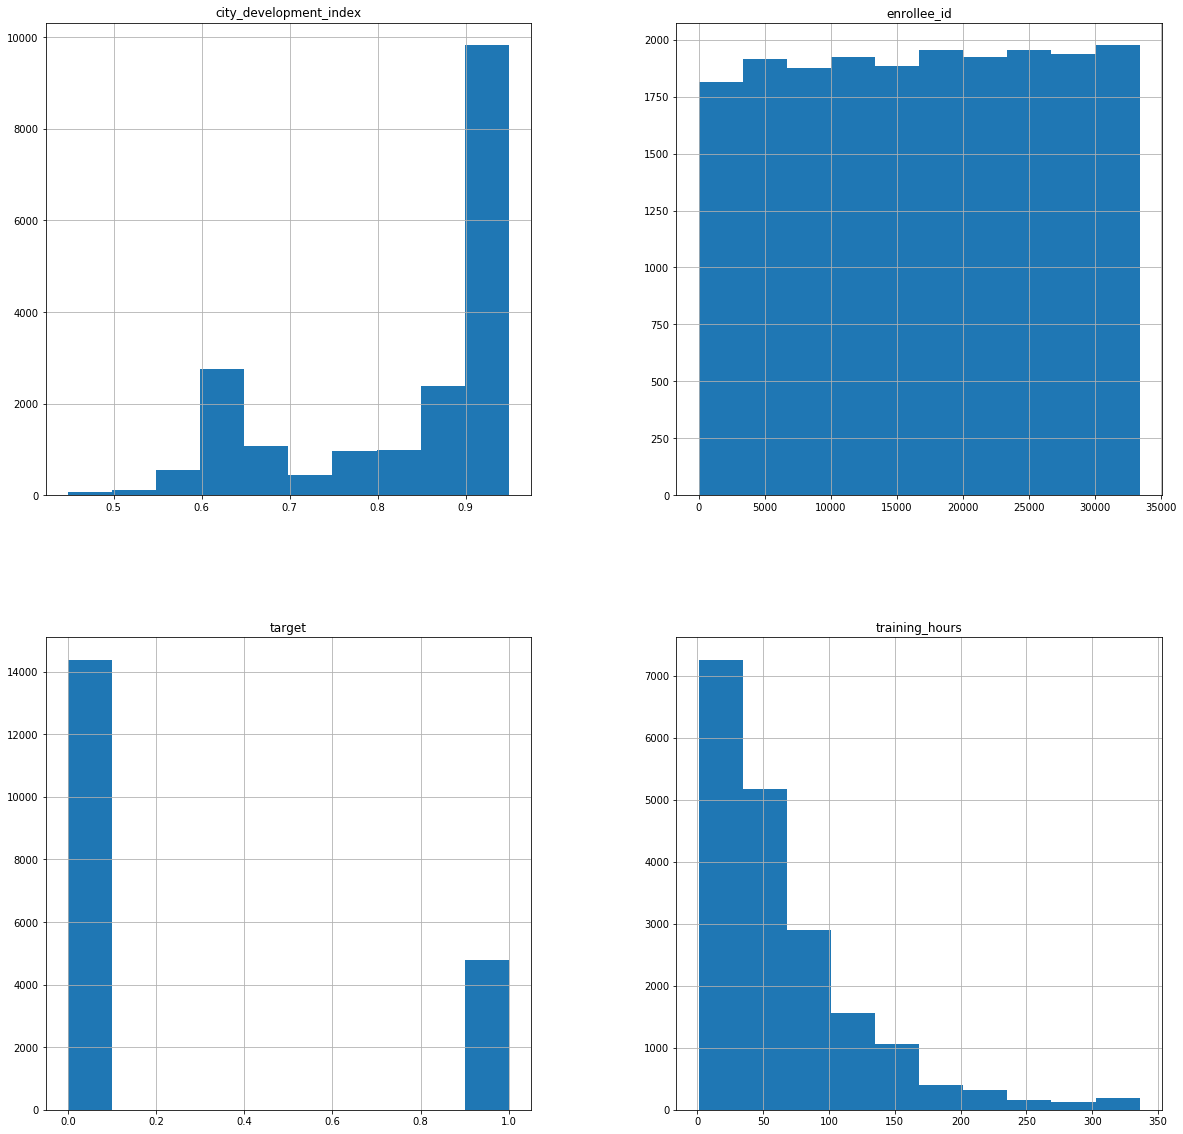

In [11]:
# Рассмотрим графики
df_hr.hist(figsize=(20,20))
plt.show()

### Предварительная оценка возможных фич

> По гистограммам видно, что отсутвуют многие признаки из нашего датасета. В таком случае необходимо всё привезти к числам. Для этого используем Label Encoding. В дальнейшем рассмотрим матрицу корреляций, чтобы выяснить какие признаки оказывают значительное влияние.

## 3. Подготовка пайплайна данных, инжиниринг фич

### Label Encoding

In [12]:
# Для удобства назовём labelencoder
labelencoder = LabelEncoder()

# Присвоение числовых значений и сохранение в другом столбце
df_hr['city_id'] = labelencoder.fit_transform(df_hr['city'])
df_hr['gender_id'] = labelencoder.fit_transform(df_hr['gender'])
df_hr['relevent_experience_id'] = labelencoder.fit_transform(df_hr['relevent_experience'])
df_hr['enrolled_university_id'] = labelencoder.fit_transform(df_hr['enrolled_university'])
df_hr['major_discipline_id'] = labelencoder.fit_transform(df_hr['major_discipline'])
df_hr['experience_id'] = labelencoder.fit_transform(df_hr['experience'])
df_hr['company_size_id'] = labelencoder.fit_transform(df_hr['company_size'])
df_hr['company_type_id'] = labelencoder.fit_transform(df_hr['company_type'])
df_hr['last_new_job_id'] = labelencoder.fit_transform(df_hr['last_new_job'])

df_hr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,city_id,gender_id,relevent_experience_id,enrolled_university_id,major_discipline_id,experience_id,company_size_id,company_type_id,last_new_job_id
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,...,1.0,5,1,0,2,5,21,4,5,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,0.0,77,1,1,2,5,6,4,5,4
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,...,0.0,64,1,1,0,5,15,4,5,5
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,...,1.0,14,1,1,2,1,20,4,5,5
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,0.0,50,1,0,2,5,21,4,1,3


### Корреляция

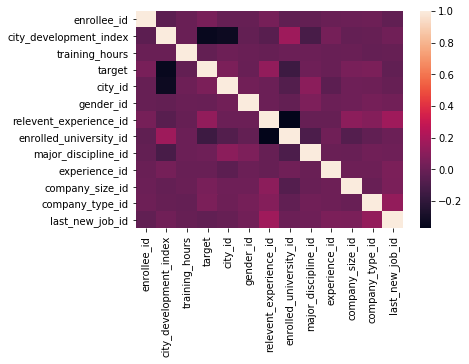

In [13]:
corr = df_hr.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

In [14]:
df_hr.corr()

,enrollee_id,city_development_index,training_hours,target,city_id,gender_id,relevent_experience_id,enrolled_university_id,major_discipline_id,experience_id,company_size_id,company_type_id,last_new_job_id
enrollee_id,1.000000,-0.040455,0.000998,0.049475,-0.011566,-0.010440,0.043359,-0.032212,-0.020201,-0.000207,0.003171,0.011807,-0.027211
city_development_index,-0.040455,1.000000,0.001920,-0.341665,-0.326104,-0.019808,-0.059808,0.165555,-0.114620,0.035405,-0.013660,-0.009773,0.022741
training_hours,0.000998,0.001920,1.000000,-0.021577,0.009537,-0.002013,-0.011566,0.003943,0.005165,-0.005260,0.002437,-0.013776,-0.008574
target,0.049475,-0.341665,-0.021577,1.000000,0.056233,-0.006733,0.128430,-0.149539,0.013223,-0.006464,0.047362,0.056685,-0.024990
city_id,-0.011566,-0.326104,0.009537,0.056233,1.000000,0.024032,0.006154,-0.074003,0.107804,-0.042534,0.017431,0.009027,-0.011676
gender_id,-0.010440,-0.019808,-0.002013,-0.006733,0.024032,1.000000,0.004455,-0.022702,0.066154,0.005106,0.014254,0.035429,0.029059
relevent_experience_id,0.043359,-0.059808,-0.011566,0.128430,0.006154,0.004455,1.000000,-0.372919,-0.009968,-0.008290,0.110379,0.087295,0.170767
enrolled_university_id,-0.032212,0.165555,0.003943,-0.149539,-0.074003,-0.022702,-0.372919,1.000000,-0.096442,0.022663,-0.071022,-0.028769,0.006387
major_discipline_id,-0.020201,-0.114620,0.005165,0.013223,0.107804,0.066154,-0.009968,-0.096442,1.000000,-0.001555,-0.003851,0.020189,0.014777
experience_id,-0.000207,0.035405,-0.005260,-0.006464,-0.042534,0.005106,-0.008290,0.022663,-0.001555,1.000000,0.008087,0.009667,0.060750


>**Вывод**
<br>На матрице корреляции видно какие признаки оказывают влияние, а именно: city_development_index, training_hours,  gender_id, enrolled_university_id, experience_id. Данные признаки мы будет использовать при обучении.<br>

### Скалирование

In [17]:
def scaling(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(data_scaled)
    return df_scaled

In [18]:
df = df_hr[['city_development_index', 'training_hours',  'gender_id', 'enrolled_university_id', 'experience_id', 'target']]

df = df.dropna()

X = df.drop('target', axis=1)
y = df['target']

X_scaled = scaling(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)


## 4. Подготовка и обучение модели, сравнение разных реализаций

### Сравнение моделей

In [19]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [20]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, Y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, Y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
5,Gaussian NB,71.31,2.06,77.40,1.64
0,Logistic Regression,71.05,1.85,70.77,1.30
2,SVM,70.41,1.80,75.95,1.20
1,Random Forest,66.82,2.00,73.33,1.20
3,KNN,66.10,2.25,74.64,1.14
4,Decision Tree Classifier,58.88,1.36,69.09,1.57


>**Вывод**
 <br>Мы видим, что логистическая регрессия показала себя хорошо. В таком случае для предсказания мы будем ипользовать логистическую регрессию.<br>

### Логистическая регрессия

In [24]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.71 (0.02)


In [28]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, Y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.6009999999999999, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.6009999999999999}
best score: 0.710058062741326


In [62]:
Y_test_predict = log_gs.predict(X_test)
Y_test_predict[0]

0.0

In [67]:
# Посмотрим, как предсказывает наша модель
from sklearn.metrics import accuracy_score

accuracy_score(Y_test_predict, Y_test)

0.7079853862212944

In [68]:
accuracy_score(y_true, y_pred, normalize=False)

2

## Выводы

Мы выяснили, что на смену потенциальной работы кандидата влияют следующие факторы:
- city_development_index - сильная обратная зависимость от target
- training_hours - достаточно сильная обратная зависимость от target
- gender_id - достаточно сильная обратная зависимость от target
- enrolled_university_id - сильная обратная зависимость от target
- experience_id - достаточно сильная обратная зависимость от target

На что компании нужно обратить внимание:
- Вуз. То есть кандидаты с определённого вуза с большей вероятностью пойдут в компанию.
- Ситуация с индексом развития города (в масштабе) говорит о том, что чем он ниже, тем больше вероятность смены работы. Компании стоит концентрироваться на более развитые города.
- Чем ниже опыт, тем больше вероятность смены работы. Достаточно интересное наблюдение. Как правило, такая ситуация характерна для студентов, которые только ищут себя и не готовы оставаться в одной компании на долгий период. Необходимо в дальнейшем изучить данный вопрос.
- Часы пройденных крусов. То есть чем меньше количество часов, тем выше вероятность, что человек сменит работу.
<br>Для полноты исследования необходимо в дальнейшем изучить причины маленького количество часов. Исходя из этого компания сможет обратить на факторы, которые в будущем смогут также использоваться для прогноза смены работы кандидата и разработки рекомендаций по удержанию.<br>

В результате работы была построена логистическая регрессионная модель, которая предсказывает со скором: 0.7079853862212944 